<a href="https://colab.research.google.com/github/Dat-291020/DATN_CSE_TLU/blob/main/DATN_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/DATN/Source Code/source_data/data_stock.csv")
data_df.head()

,Date,Close
0,2/8/2010,4538.799805
1,2/9/2010,4520.700195
2,2/10/2010,4533.000000
3,2/11/2010,4575.799805
4,2/12/2010,4588.799805


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1498 non-null   object 
 1   Close   1498 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.5+ KB


In [ ]:
data_df.shape

(1498, 2)

In [ ]:
data_df.isnull().sum()

Date     0
Close    0
dtype: int64

In [ ]:
data_df.describe()

,Close
count,1498.000000
mean,4928.421760
std,483.663191
min,3927.600098
25%,4503.949951
50%,4939.349853
75%,5334.500000
max,5954.799805


In [ ]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data/len(data_df)*100
    print(f"Column {col}: has {missing_percent}%")

Column Date: has 0.0%
Column Close: has 0.0%


In [ ]:
Z = data_df.iloc[:, 1:] 
Z = Z.dropna()
len(Z)

1498

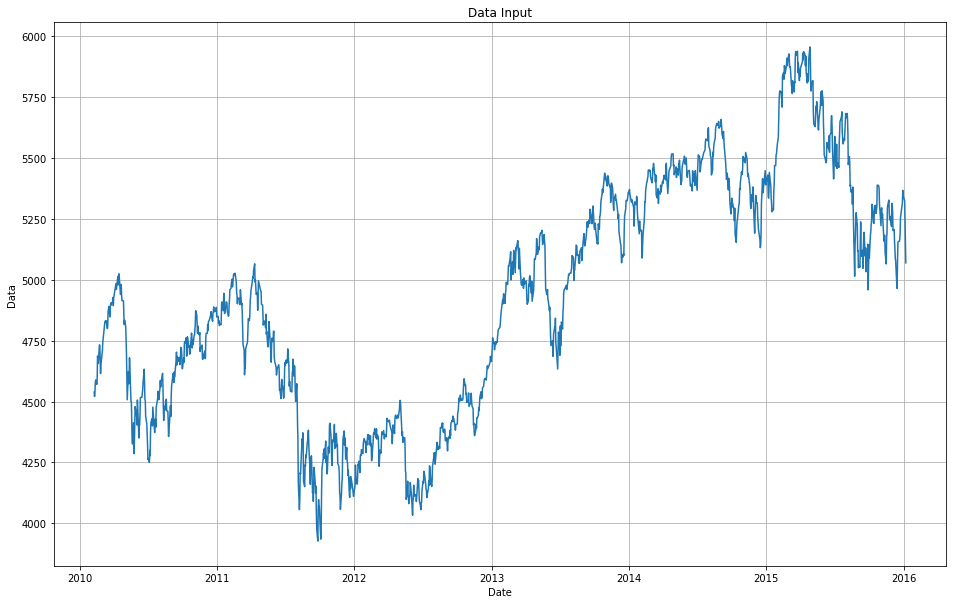

In [ ]:
#plot close price
data_df = data_df.set_index(pd.to_datetime(data_df['Date'], format='%m/%d/%Y'))
data_df = data_df.drop(['Date'], axis=1)

plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Data')
plt.plot(data_df['Close'])
plt.title('Data Input')
plt.show()

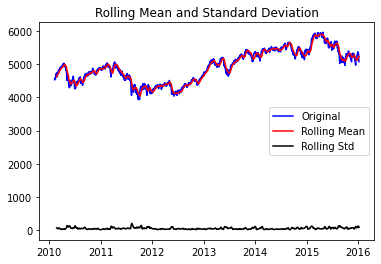

Results of dickey fuller test
Test Statistics                  -1.627824
p-value                           0.468630
No. of lags used                  8.000000
Number of observations used    1489.000000
critical value (1%)              -3.434749
critical value (5%)              -2.863483
critical value (10%)             -2.567804
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data_df['Close'])

<Figure size 432x288 with 0 Axes>

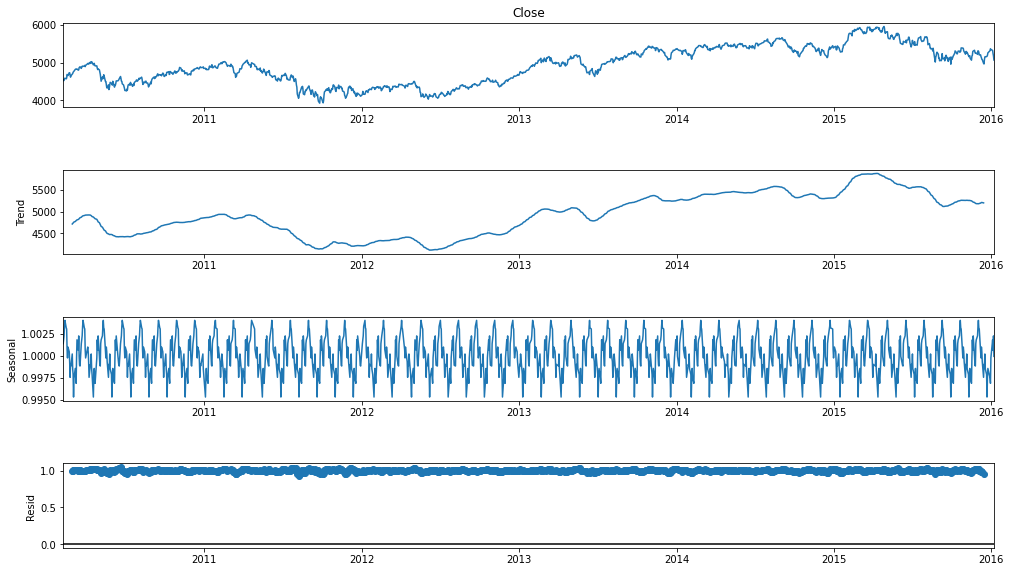

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data_df['Close'], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
folder = '/content/drive/MyDrive/DATN/Data'
np.savetxt(folder+ "data.csv", data_df)